# Atelier IC

## Importation de bicliothéques

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Variables floues

In [9]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
vibration = ctrl.Antecedent(np.arange(0, 11, 1), 'vibration')
age = ctrl.Antecedent(np.arange(0, 21, 1), 'age')
risque = ctrl.Consequent(np.arange(0, 11, 1), 'risque')

## Fonctions d'appartenance

In [10]:
temperature['basse'] = fuzz.trimf(temperature.universe, [0, 0, 40])
temperature['normale'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['elevee'] = fuzz.trimf(temperature.universe, [60, 100, 100])

vibration['faible'] = fuzz.trimf(vibration.universe, [0, 0, 4])
vibration['moyenne'] = fuzz.trimf(vibration.universe, [2, 5, 8])
vibration['forte'] = fuzz.trimf(vibration.universe, [6, 10, 10])

age['neuf'] = fuzz.trimf(age.universe, [0, 0, 7])
age['moyen'] = fuzz.trimf(age.universe, [5, 10, 15])
age['ancien'] = fuzz.trimf(age.universe, [12, 20, 20])

risque['faible'] = fuzz.trimf(risque.universe, [0, 0, 4])
risque['moyen'] = fuzz.trimf(risque.universe, [2, 5, 8])
risque['eleve'] = fuzz.trimf(risque.universe, [6, 10, 10])

## Formulez les règles d’inférence floues 

In [11]:
rule1 = ctrl.Rule(temperature['elevee'] | vibration['forte'], risque['eleve'])
rule2 = ctrl.Rule(age['ancien'] & vibration['moyenne'], risque['moyen'])
rule3 = ctrl.Rule(temperature['basse'] & vibration['faible'] & age['neuf'], risque['faible'])
rule4 = ctrl.Rule(temperature['normale'] & age['moyen'], risque['moyen'])

## Créez et simulez le contrôleur 

In [13]:
controle_risque = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simul_risque = ctrl.ControlSystemSimulation(controle_risque)

## Génération de données synthétiques

In [14]:
#Générez 2000 échantillons aléatoires de température, vibration et âge.
np.random.seed(42)
n_samples = 2000

temps_samples = np.random.uniform(0, 100, n_samples)
vib_samples = np.random.uniform(0, 10, n_samples)
age_samples = np.random.uniform(0, 20, n_samples)
Calculez pour chacun la valeur défuzzifiée du risque à partir du modèle flou. 
risque_samples = []
for t, v, a in zip(temps_samples, vib_samples, age_samples):
    simul_risque.input['temperature'] = t
    simul_risque.input['vibration'] = v
    simul_risque.input['age'] = a
    try:
        simul_risque.compute()
        risque_samples.append(simul_risque.output['risque'])
    except KeyError:
        # Si aucune règle n'est activée, on prend la moyenne
        risque_samples.append(5.0)
X = np.vstack([temps_samples, vib_samples, age_samples]).T
y = np.array(risque_samples)

## Entraînez un modèle de régression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.021437860758175765
R2 score: 0.9943773400721514


Le modèle ML présente une erreur quadratique moyenne (MSE) = 0,0214, ce qui est extrêmement faible et proche de zéro ce qui signifie que les prédictions du modèle sont très proches des vraies valeurs du risque calculé par le système flou
et le coefficient de détermination R² = 0,9943, indiquant que 99,43 % de la variance du risque flou est expliquée par le modèle ML. Autrement dit, le modèle reproduit quasiment parfaitement le comportement du système flou, montrant une très forte correspondance entre les prédictions et les valeurs réelles.

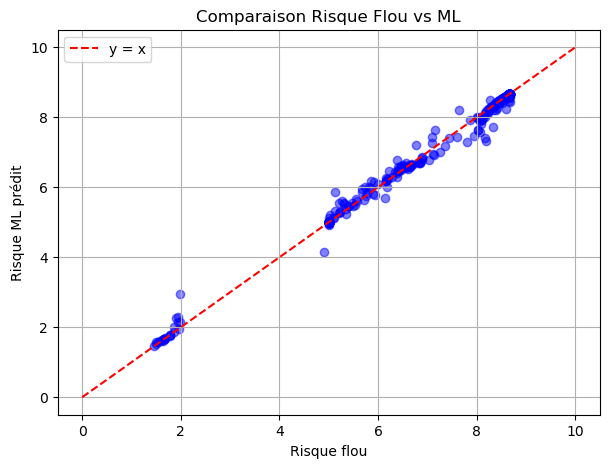

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0,10],[0,10], 'r--', label="y = x")
plt.xlabel("Risque flou")
plt.ylabel("Risque ML prédit")
plt.title("Comparaison Risque Flou vs ML")
plt.legend()
plt.grid(True)
plt.show()

## Interprétation et Analyse:  

### Comparez les prédictions floues et celles du modèle ML.

Les prédictions du modèle ML sont très proches de celles générées par le système flou. Le MSE très faible et le R² proche de 1 montrent que le modèle ML reproduit presque parfaitement le comportement du système flou, même sur des données nouvelles.

### Quels sont les avantages de chaque approche

**Logique floue :**

-- Transparence et interprétabilité des règles

-- Facile à comprendre et à expliquer

**Machine Learning :**

-- Haute précision sur les prédictions

-- Capacité de généralisation pour des données non vues auparavant